# Feature set 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import time

Using TensorFlow backend.


#### Extracting data from csv files into numpy arrays

In [2]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
files_data=np.array(['fold_data_1.csv','fold_data_2.csv','fold_data_3.csv','fold_data_4.csv','fold_data_5.csv',
                'fold_data_6.csv','fold_data_7.csv','fold_data_8.csv','fold_data_9.csv','fold_data_10.csv'])
X_data_data= np.array([genfromtxt(file,delimiter=',') for file in files_data])

files_label=(['fold_labels_1.csv','fold_labels_2.csv','fold_labels_3.csv','fold_labels_4.csv','fold_labels_5.csv',
                'fold_labels_6.csv','fold_labels_7.csv','fold_labels_8.csv','fold_labels_9.csv','fold_labels_10.csv'])
Y_data_labels= np.array([genfromtxt(file,delimiter=',') for file in files_label])


In [3]:
print(np.shape(X_data_data[0]))

(873, 240)


#### Converting to Hot Encoder

In [4]:
Y_data=([to_categorical(Y_data_labels, num_classes=10) for Y_data_labels in Y_data_labels])

#### Reshaping to 1D

In [5]:
X_data_1D=([np.reshape(X_data_data,(X_data_data.shape[0], 240, 1)) for X_data_data in X_data_data])

#### Reshaping to 2D

In [6]:
X_data_2D=([np.reshape(X_data_1D,(X_data_1D.shape[0], 60, 4)) for X_data_1D in X_data_1D])
print(np.shape(X_data_2D[0]))

(873, 60, 4)


#### CNN formatting

In [7]:
X_data=([np.reshape(X_data_2D,(X_data_2D.shape[0],60,4,1)) for X_data_2D in X_data_2D])

#### Shapes of the data


In [8]:
for i in range((10)):
    print("X_data",i+1,"=",np.shape(X_data[i]))
    print("Y_data",i+1,"=",np.shape(Y_data[i]))

X_data 1 = (873, 60, 4, 1)
Y_data 1 = (873, 10)
X_data 2 = (888, 60, 4, 1)
Y_data 2 = (888, 10)
X_data 3 = (925, 60, 4, 1)
Y_data 3 = (925, 10)
X_data 4 = (990, 60, 4, 1)
Y_data 4 = (990, 10)
X_data 5 = (936, 60, 4, 1)
Y_data 5 = (936, 10)
X_data 6 = (823, 60, 4, 1)
Y_data 6 = (823, 10)
X_data 7 = (838, 60, 4, 1)
Y_data 7 = (838, 10)
X_data 8 = (806, 60, 4, 1)
Y_data 8 = (806, 10)
X_data 9 = (816, 60, 4, 1)
Y_data 9 = (816, 10)
X_data 10 = (837, 60, 4, 1)
Y_data 10 = (837, 10)


#### Model

In [9]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,merge,Activation

In [10]:
# Model from GitHub

#adding layers and forming the model

#forming model
model=Sequential()

model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(60,4,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#### Selecting Test sets and combining them

In [11]:
Test1=([0,1,2,3,4,5,6,7,8,9])
Test2=([1,2,3,4,5,6,7,8,9,0])
Test=([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,0)])
Testing_set=[Test for Test in Test]
x_test=[np.vstack([X_data[Testing_set[0][0]],X_data[Testing_set[0][1]]]) for Testing_set[0] in Test]
y_test=[np.vstack([Y_data[Testing_set[0][0]],Y_data[Testing_set[0][1]]]) for Testing_set[0] in Test]

#### Choosing Batch size and number of Epochs

In [12]:
Accuracy_array=[]
accuracy_total=0
end_array=[]

Epoch_array_accuracy=[]
Loss_array=[]
Fold_accuracy=[]

Val_accuracy_array=[]
Val_Loss_array=[]

Batch_size=50
Epoch_number=30

In [13]:
for i in range(10):
    start = time.time()
    Training_array=np.array([0,1,2,3,4,5,6,7,8,9])
    Training_array = Training_array[Training_array != Test1[i]]
    Training_array = Training_array[Training_array != Test2[i]]
    
    print("\nFOLD",i+1,"\n- - - - - - - - - - - - - - - - - - - - ")
    
    print("Testing on Folds:",Test[i])
    
    Training_set=[Training_array for Training_array in Training_array]
    
    print("Training off of Folds:",Training_set)
    
    X_train = np.vstack([X_data[Training_set[0]],X_data[Training_set[1]],X_data[Training_set[2]],X_data[Training_set[3]]
                        ,X_data[Training_set[4]],X_data[Training_set[5]],X_data[Training_set[6]],X_data[Training_set[7]]])
    
    Y_train = np.vstack([Y_data[Training_set[0]],Y_data[Training_set[1]],Y_data[Training_set[2]],Y_data[Training_set[3]]
                        ,Y_data[Training_set[4]],Y_data[Training_set[5]],Y_data[Training_set[6]],Y_data[Training_set[7]]])                   
   
    model_history = model.fit(X_train,Y_train,batch_size=Batch_size,epochs=Epoch_number,validation_data=(x_test[i],y_test[i]),verbose=0)
    accuracy=model_history.history['accuracy']
    accuracy_avg=sum(accuracy)/Epoch_number
    Fold_accuracy.append(accuracy_avg)
    print("Accuracy of Fold",i+1,"is",round((Fold_accuracy[i]),3))
    end = time.time()
    print("Time to train Fold",i+1,":",round(((end)- (start)),4),"seconds.")
    end_array.append(round(((end)- (start)),4))
    
    Epoch_array=model_history.history['accuracy']
    Epoch_array_accuracy.append(Epoch_array)
    loss=model_history.history['loss']
    Loss_array.append(loss)
    
    
    Epoch_val_array=model_history.history['val_accuracy']
    Val_accuracy_array.append(Epoch_val_array)
    
    loss_val=model_history.history['val_loss']
    Val_Loss_array.append(loss_val)
    
    

Avg_Accuracy=(sum(Fold_accuracy))/(10)       
Time=sum(end_array)
print("\n - - - - - - - - - - - - - - -\nThe average accuracy of the model:",(Avg_Accuracy))
print("The time taken to run model:",Time)


FOLD 1 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (0, 1)
Training off of Folds: [2, 3, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 1 is 0.464
Time to train Fold 1 : 227.6407 seconds.

FOLD 2 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (1, 2)
Training off of Folds: [0, 3, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 2 is 0.694
Time to train Fold 2 : 222.8771 seconds.

FOLD 3 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (2, 3)
Training off of Folds: [0, 1, 4, 5, 6, 7, 8, 9]
Accuracy of Fold 3 is 0.776
Time to train Fold 3 : 221.6461 seconds.

FOLD 4 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (3, 4)
Training off of Folds: [0, 1, 2, 5, 6, 7, 8, 9]
Accuracy of Fold 4 is 0.804
Time to train Fold 4 : 217.5902 seconds.

FOLD 5 
- - - - - - - - - - - - - - - - - - - - 
Testing on Folds: (4, 5)
Training off of Folds: [0, 1, 2, 3, 6, 7, 8, 9]
Accuracy of Fold 5 is 0.832
Time to train Fold 5 : 268.8147 seconds.

FOLD 6 
- - - - - - - - - - - - - - - -

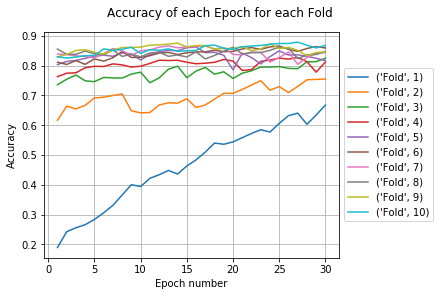

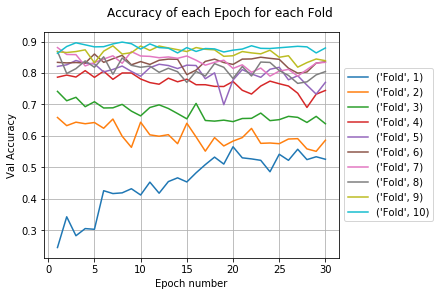

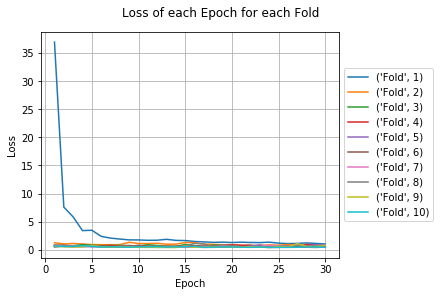

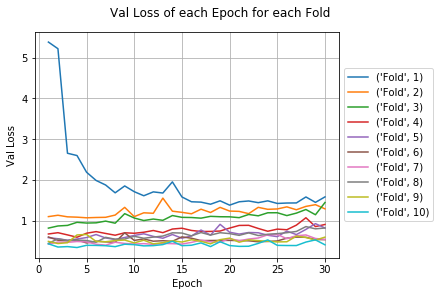

In [17]:
%matplotlib inline
epoch_array=np.linspace(1,Epoch_number,num=((Epoch_number)))
fig,ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig.suptitle(f"Accuracy of each Epoch for each Fold")
ax1.set_xlabel("Epoch number")
ax1.set_ylabel("Accuracy")
ax1.grid()
for i in range(10):
    ax1.plot(epoch_array,Epoch_array_accuracy[i],label=('Fold',i+1))
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
epoch_array=np.linspace(1,Epoch_number,num=((Epoch_number)))
fig,ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig.suptitle(f"Accuracy of each Epoch for each Fold")
ax1.set_xlabel("Epoch number")
ax1.set_ylabel("Val Accuracy")
ax1.grid()
for i in range(10):
    ax1.plot(epoch_array,Val_accuracy_array[i],label=('Fold',i+1))
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    

epoch_array=np.linspace(1,Epoch_number,num=((Epoch_number)))
fig1,ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig1.suptitle(f"Loss of each Epoch for each Fold")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.grid()
for i in range(10):
    ax2.plot(epoch_array,Loss_array[i],label=('Fold',i+1))
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
    
    
epoch_array=np.linspace(1,Epoch_number,num=((Epoch_number)))
fig1,ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
fig1.suptitle(f"Val Loss of each Epoch for each Fold")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Val Loss")
ax2.grid()
for i in range(10):
    ax2.plot(epoch_array,Val_Loss_array[i],label=('Fold',i+1))
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    

In [18]:
data= {'Fold': ['1','2','3','4','5','6','7','8','9','10'],
        'Accuracy': [Fold_accuracy[0],Fold_accuracy[1],Fold_accuracy[2],Fold_accuracy[3],Fold_accuracy[4],
                    Fold_accuracy[5],Fold_accuracy[6],Fold_accuracy[7],Fold_accuracy[8],Fold_accuracy[9]],
        'Time Taken' :[end_array[0],end_array[1],end_array[2],end_array[3],end_array[4],end_array[5],end_array[6],end_array[7],
                end_array[8],end_array[9]]}

df = pd.DataFrame(data, columns = ['Fold', 'Accuracy','Time Taken'])
data_avg={'Average Accuracy':[Avg_Accuracy],
         'Total Time':[Time]}
df_avg=pd.DataFrame(data_avg,columns=['Average Accuracy','Total Time'])
print (df)

print ("\n",df_avg)

  Fold  Accuracy  Time Taken
0    1  0.464410    227.6407
1    2  0.693776    222.8771
2    3  0.776192    221.6461
3    4  0.803889    217.5902
4    5  0.832368    268.8147
5    6  0.840749    144.7953
6    7  0.843694    156.4568
7    8  0.841524    166.5748
8    9  0.855973    155.0138
9   10  0.855492    158.3550

    Average Accuracy  Total Time
0          0.780806   1939.7645


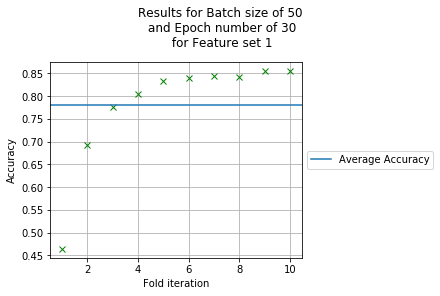

In [19]:
%matplotlib inline
Fold_iteration=np.array([1,2,3,4,5,6,7,8,9,10])
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
ax1.plot(Fold_iteration,Fold_accuracy,"gx")
ax1.axhline(y=Avg_Accuracy,label='Average Accuracy')
#ax1.set_title('Results for a batch size of',Batch_size,'and',Epoch_number,'.')
fig.suptitle(f"Results for Batch size of {Batch_size}\n and Epoch number of {Epoch_number}\n for Feature set 1")
ax1.set_xlabel("Fold iteration")
ax1.set_ylabel("Accuracy")
ax1.grid()
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))